In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline 

import seaborn as sns

In [11]:
import os
import pandas as pd
import numpy as np

from utils.datatools import *

In [12]:
PHASEPATH = "/Users/sujinlee/desktop/git_repositories/nims_pd/dataset_LHEE_RHEE_Z_PHASE/"
SAVEPATH = "/Users/sujinlee/desktop/git_repositories/nims_pd/dataset_LHEE_RHEE_Z_PHASE_STD/"
CONTROL_PATH = os.path.join(SAVEPATH, "Controls")
PD_PATH = os.path.join(SAVEPATH, "PD")

if os.path.exists(SAVEPATH) == False: os.mkdir(SAVEPATH)
if os.path.exists(CONTROL_PATH) == False: os.mkdir(CONTROL_PATH)
if os.path.exists(PD_PATH) == False: os.mkdir(PD_PATH)

In [13]:
patients = getPatientsTable()
# patients.head()

In [14]:
CONTROL = patients[patients["Category"] == "Controls"]
PD = patients[patients["Category"] == "PD"]

In [15]:
print("Controls count:", len(CONTROL))
print("PD count:", len(PD))

Controls count: 22
PD count: 83


----

---

In [18]:
TARGET_CATE = "PD"
# TARGET_PATIENT_INITIAL = PD.iloc[10]["Patient"]
TARGET_PATIENT_INITIAL = 'BDY'

print("Target Category:", TARGET_CATE)
print("Target Patient Initial:", TARGET_PATIENT_INITIAL)

Target Category: PD
Target Patient Initial: BDY


In [37]:
FWdata = [
    pd.read_csv(os.path.join(PD_PATH, f"LHEE0_{TARGET_PATIENT_INITIAL}_FW24.csv")),
    pd.read_csv(os.path.join(PD_PATH, f"LHEE0_{TARGET_PATIENT_INITIAL}_FW27.csv")),
    pd.read_csv(os.path.join(PD_PATH, f"LHEE0_{TARGET_PATIENT_INITIAL}_FW64.csv"))
]

In [38]:
data = FWdata[0]

In [39]:
data.head()

,Frame,Sub Frame,LFHD_X,LFHD_Y,LFHD_Z,RFHD_X,RFHD_Y,RFHD_Z,LBHD_X,LBHD_Y,...,RTOE_Z,CentreOfMass_X,CentreOfMass_Y,CentreOfMass_Z,CentreOfMassFloor_X,CentreOfMassFloor_Y,CentreOfMassFloor_Z,LHEE_Z_DIFF,RHEE_Z_DIFF,PHASE
0,262,0,3.119052,33.629029,1415.707798,122.698583,20.265991,1417.327305,-14.033373,-135.442260,...,4.993449,64.721990,-104.204223,823.299412,64.721990,-104.204223,-22.600063,0.469219,5.577706,1.0
1,263,0,1.579874,44.953247,1415.364903,120.977827,31.268921,1416.954747,-15.889296,-124.145385,...,4.990971,63.888776,-93.378784,822.803562,63.888776,-93.378784,-22.600063,0.866421,6.303550,1.0
2,264,0,-0.080100,56.163452,1415.418980,119.156850,42.223389,1416.960728,-17.822093,-112.916382,...,5.025944,63.017000,-82.446289,822.521153,63.017000,-82.446289,-22.600063,1.071741,7.095864,1.0
3,265,0,-1.832823,67.284302,1415.847325,117.254941,53.140991,1417.307164,-19.804118,-101.779419,...,5.105135,62.130537,-71.405884,822.447117,62.130537,-71.405884,-22.600063,1.166725,7.868851,1.0
4,266,0,-3.638361,78.303467,1416.588902,115.291608,64.043579,1417.948521,-21.786742,-90.732055,...,5.215891,61.256330,-60.254883,822.567417,61.256330,-60.254883,-22.600063,1.192627,8.570533,1.0


In [22]:
# row 0
data.iloc[0]["LHEE_X"], data.iloc[0]["LHEE_Y"], data.iloc[0]["LHEE_Z"]

(0.0, 0.0, 0.0)

In [23]:
# row 1
data.iloc[1]["LHEE_X"], data.iloc[1]["LHEE_Y"], data.iloc[1]["LHEE_Z"]

(-0.118119, 2.6594239999999445, 0.8664210000000026)

<AxesSubplot:>

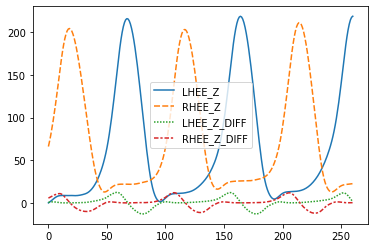

In [24]:
sns.lineplot(data=data[["LHEE_Z", "RHEE_Z", "LHEE_Z_DIFF", "RHEE_Z_DIFF"]])

<AxesSubplot:>

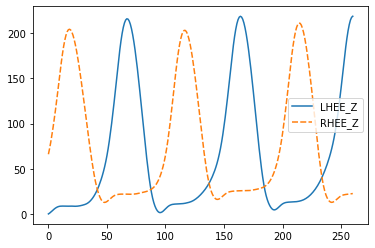

In [25]:
sns.lineplot(data=data[["LHEE_Z", "RHEE_Z"]])

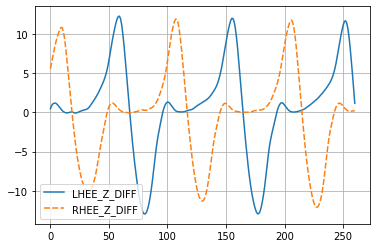

In [26]:
sns.lineplot(data=data[["LHEE_Z_DIFF", "RHEE_Z_DIFF"]])
plt.grid()

In [27]:
np.where(data["PHASE"] == 1)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         17,  18,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
         60,  61,  62,  63,  64,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
        158, 159, 160, 161, 162, 163, 164, 194, 195, 196, 197, 198, 199,
        200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
        213, 214, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253,
        254, 255, 256, 257, 258, 259, 260]),)

In [28]:
start = [np.where(data["PHASE"] == 1)[0][0]] + [ x for idx, x in enumerate(np.where(data["PHASE"] == 1)[0][1:]) if x -np.where(data["PHASE"] == 1)[0][idx] > 5 ]
start

[0, 49, 96, 145, 194, 243]

In [29]:
for f in start:
    print()
    print(data.iloc[f][["LHEE_Z", "RHEE_Z"]])


LHEE_Z     0.000000
RHEE_Z    66.025601
Name: 0, dtype: float64

LHEE_Z    57.887120
RHEE_Z    13.015416
Name: 49, dtype: float64

LHEE_Z     1.541140
RHEE_Z    43.935177
Name: 96, dtype: float64

LHEE_Z    60.734768
RHEE_Z    16.154408
Name: 145, dtype: float64

LHEE_Z     4.786257
RHEE_Z    50.706143
Name: 194, dtype: float64

LHEE_Z    77.760914
RHEE_Z    13.049652
Name: 243, dtype: float64


## 3) Z left-right

### 1- LHEE Standardized values

<AxesSubplot:>

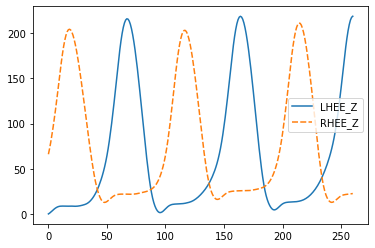

In [30]:
sns.lineplot(data=data[["LHEE_Z", "RHEE_Z"]])

<AxesSubplot:>

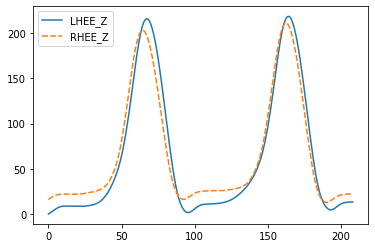

In [31]:
sns.lineplot(data=pd.DataFrame({
            "LHEE_Z" : data.iloc[0:-(start[1]+3)]["LHEE_Z"].values,
            "RHEE_Z" : data.iloc[start[1]+3:]["RHEE_Z"].values})
            )

### 2- Vector

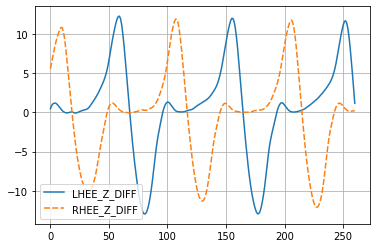

In [32]:
sns.lineplot(data=data[["LHEE_Z_DIFF", "RHEE_Z_DIFF"]])
plt.grid()

<AxesSubplot:>

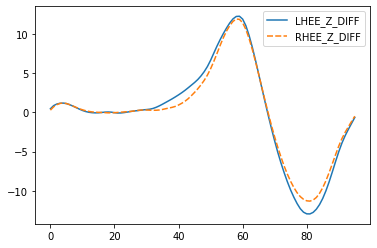

In [46]:
sns.lineplot(data=pd.DataFrame({
            "LHEE_Z_DIFF" : data.iloc[0:start[2]]["LHEE_Z_DIFF"].values,
            "RHEE_Z_DIFF" : data.iloc[start[1]:start[1]+start[2]]["RHEE_Z_DIFF"].values})
            )

## 4) x-y 

In [35]:
# 2d x-y 그리기 
def plot2Dxy(mark, data):
    plt.plot(data[mark+"_X"], data[mark+"_Y"])
    plt.title(mark)
    plt.xlabel("X")
    plt.ylabel("Y")

    return plt

<module 'matplotlib.pyplot' from '/Users/sujinlee/.virtualenvs/ml/lib/python3.9/site-packages/matplotlib/pyplot.py'>

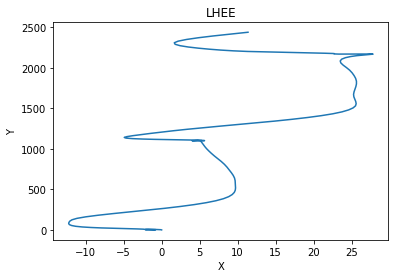

In [36]:
plot2Dxy("LHEE", data)

In [42]:
# 2D x-y trial 겹쳐 그리기
def plot2Dxytrials(mark, dataList, patient_initial):
    if len(dataList) == 2:
        plt.plot(FWdata[0][mark+"_X"], FWdata[0][mark+"_Y"], 'r', 
                 FWdata[1][mark+"_X"], FWdata[1][mark+"_Y"], 'g')
    if len(dataList) == 3:
        plt.plot(FWdata[0][mark+"_X"], FWdata[0][mark+"_Y"], 'r', 
                 FWdata[1][mark+"_X"], FWdata[1][mark+"_Y"], 'g',
                 FWdata[2][mark+"_X"], FWdata[2][mark+"_Y"], 'b')
    plt.title(patient_initial + " " + mark)
    plt.xlabel("X")
    plt.ylabel("Y")    
    plt.show()

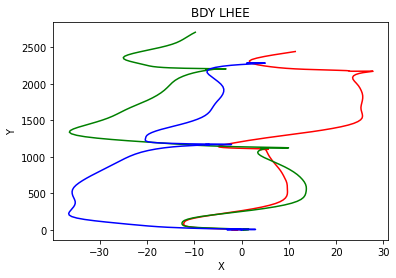

In [43]:
plot2Dxytrials("LHEE", FWdata, TARGET_PATIENT_INITIAL)